<a id='sections'></a>
## Contents

- [Webscraping](#webscraping)
- [Answers](#q1)
    - [1. What is the title of the paper with the most related papers since 2010 (inclusive)?](#q1)
    - [2. Which keyword appears the most in this collection of papers and how many times does it appear?](#q2)
    - [3. How does the number of authors that worked on a paper impact the number of related papers?](#q3)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
import datetime as dt
from collections import Counter

<a id='webscraping'></a>
### Webscraping

[Back to top navigation](#sections)

In [2]:
# import list of urls to scrape 
url_list = pd.read_csv('papers.csv', header=None)

In [3]:
papers = []

for url in url_list[0]:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    pane = soup.find("li", {'id': "pane-pcw-details"}) # information pane on the right
    
    paper = {} # to store metadata of academic paper
    
    # TITLE
    title = pane.find('p', {'class':'epub-section__state'}).text
    paper['title'] = title.split(':')[1]
    
    # AUTHORS    
    name_list = []
    names = pane.find('div', {'class':'accordion-tabbed loa-accordion'}).find_all("a", "entryAuthor")
    for name in names:
        name_list.append(name.text)
    paper['authors'] = name_list
    
    # PUBLISHED DATE
    # info containing received, accepted & published dates
    info = pane.find('ul', {'class':'rlist article-chapter-history-list'}).find_all('li')
    for line in info:
        m = re.search(r'Published', line.text) # search for line containing published date
        if m:
            published_date = line.text.split(':')[1]
            date_object = datetime.strptime(published_date, '%B %d, %Y').date()
            paper['published_date'] = date_object
            
    # KEYWORDS
    kw_list = []
    keywords = pane.find_all('a', {'class':'badge-type'})
    for kw in keywords:
        kw_list.append(kw.text)
    paper['keywords'] = kw_list
    
    # TOTAL NUMBER OF RELATED PAPERS
    # list of papers that cited this paper
    cited_by_list = soup.find('div', {'id':'relatedTab1', 'class':'accordion-tabbed__content'}).find_all('div', {'class': 'related__title'})
    paper['num_related_papers'] = len(cited_by_list)
    
    papers.append(paper)

In [4]:
df = pd.DataFrame(papers)

In [5]:
df.head()

,title,authors,published_date,keywords,num_related_papers
0,Patient Prioritization in Emergency Department...,"[Yichuan Ding, Eric Park, Mahesh Nagarajan, Er...",2019-04-08,"[empirical research, emergency department, dyn...",7
1,Measuring and Exploiting the Impact of Exhibit...,"[Victor Martínez-de-Albéniz, Ana Valdivia]",2018-12-06,"[art, cultural content, consumer engagement, c...",4
2,Effects of Rescheduling on Patient No-Show Beh...,"[Jiayi Liu, Jingui Xie, Kum Khiong Yang, Zhich...",2019-02-18,"[appointment scheduling, rescheduling, no-show...",2
3,To Wait or Not to Wait,"[Kaan Kuzu, Long Gao, Susan H. Xu]",2019-04-25,"[customer behaviors, service systems, ticket q...",2
4,Modeling Newsvendor Behavior,"[Bhavani Shanker Uppari, Sameer Hasija]",2018-07-20,"[newsvendor problem, prospect theory, referenc...",13


In [6]:
# count the number of authors 
df['num_authors'] = df.authors.apply(len)

In [7]:
# extract publishing year
df['published_year'] = pd.to_datetime(df.published_date).dt.year

In [8]:
df.head()

,title,authors,published_date,keywords,num_related_papers,num_authors,published_year
0,Patient Prioritization in Emergency Department...,"[Yichuan Ding, Eric Park, Mahesh Nagarajan, Er...",2019-04-08,"[empirical research, emergency department, dyn...",7,4,2019
1,Measuring and Exploiting the Impact of Exhibit...,"[Victor Martínez-de-Albéniz, Ana Valdivia]",2018-12-06,"[art, cultural content, consumer engagement, c...",4,2,2018
2,Effects of Rescheduling on Patient No-Show Beh...,"[Jiayi Liu, Jingui Xie, Kum Khiong Yang, Zhich...",2019-02-18,"[appointment scheduling, rescheduling, no-show...",2,4,2019
3,To Wait or Not to Wait,"[Kaan Kuzu, Long Gao, Susan H. Xu]",2019-04-25,"[customer behaviors, service systems, ticket q...",2,3,2019
4,Modeling Newsvendor Behavior,"[Bhavani Shanker Uppari, Sameer Hasija]",2018-07-20,"[newsvendor problem, prospect theory, referenc...",13,2,2018


<a id='q1'></a>
### 1. What is the title of the paper with the most related papers since 2010 (inclusive)?
[Back to top navigation](#sections)

In [9]:
# subset df for year >= 2010
df_from_2010 = df[df.published_year >= 2010]

In [10]:
t = df_from_2010.sort_values('num_related_papers', ascending=False).head(1)['title'].values

In [11]:
print('The title of the paper with the most related papers since 2010 (inclusive) is: \n', str(t))

The title of the paper with the most related papers since 2010 (inclusive) is: 
 ['Pricing Multiple Products with the Multinomial Logit and Nested Logit Models']


<a id='q2'></a>
### 2. Which keyword appears the most in this collection of papers and how many times does it appear?
[Back to top navigation](#sections)

In [12]:
# flatten list of keyword lists
all_kws = [kw for lst in df.keywords for kw in lst]

In [13]:
# count the frequency of each keyword
counts = Counter(all_kws)

In [14]:
# sort the keywords by frequency in descending order
counts.most_common()[:10]

[('pricing', 9),
 ('behavioral operations', 8),
 ('service operations', 7),
 ('supply chain management', 6),
 ('game theory', 5),
 ('empirical research', 4),
 ('inventory', 4),
 ('dynamic programming', 4),
 ('bounded rationality', 4),
 ('behavioral operations management', 4)]

The most common keyword is **'pricing'**. It appeared 9 times.

<a id='q3'></a>
### 3. How does the number of authors that worked on a paper impact the number of related papers?
[Back to top navigation](#sections)

In [15]:
def scatterplot(dataframe, x, y, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(8,7))
    ax = sns.regplot(x=dataframe[x], y=dataframe[y], data=dataframe)
    ax.set_title(title, fontsize=16)                 
    ax.set_xlabel(x_label, fontsize=13)
    ax.set_ylabel(y_label, fontsize=13)

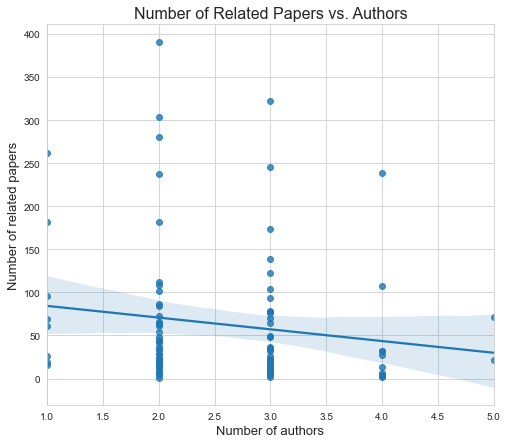

In [16]:
scatterplot(df, 'num_authors', 'num_related_papers', 'Number of authors', 'Number of related papers', 'Number of Related Papers vs. Authors')

Although there seems to be a slight downward trend in the graph, we cannot conclude that the number of authors impacts the number of related papers. 

The downward trend we see is likely contributed by the effect of outliers with unusually high counts of related papers for num_authors = 2/3/4, particularly for num_authors=2. As these outliers are the exception rather than the norm, we have insufficient evidence to state that there is a relationship between the number of authors and number of related papers.